In [1]:
import sys

sys.path.append('..')

In [2]:
from pathlib import Path

import numpy as np
from ipywidgets import interact
from PIL import Image, ImageDraw
from wand.image import Image as WImage

from digi_leap.label import Label, BLACK, WHITE

In [3]:
DATA_DIR = Path('..') / 'data'
LABELS_DIR = DATA_DIR / 'labels' / 'typewritten'
# LABELS_DIR = DATA_DIR / 'labels' / 'handwritten'

In [4]:
IMAGES = sorted(LABELS_DIR.glob('*.jpg'))

IDX = 3240  # A target image with plenty of underlines

### Display the raw image

In [5]:
def raw_image(idx):
    path = IMAGES[idx]
    print(path)
    image = Image.open(path)
    display(image)


# raw_image(IDX)
# interact(raw_image, idx=(0, len(IMAGES) - 1))

### Display the problem with underlines

In [6]:
def problem(idx):
    label = Label(IMAGES[idx])
    label.binarize()
    text = label.ocr_text()

    print(label.path, '\n')
    print(text)
    display(label.to_pil())


# problem(IDX)
# interact(problem, idx=(0, len(IMAGES) - 1))

### Find lines

In [7]:
def show_lines(idx):
    label = Label(IMAGES[idx])
    label.deskew()
    label.binarize()

    h_lines = label.find_horizontal_lines(line_length=100, line_gap=5)
    v_lines = label.find_vertical_lines(line_length=100, line_gap=5)

    label.background = WHITE
    image = label.to_pil()

    image = image.convert('RGB')
    draw = ImageDraw.Draw(image)

    for line in h_lines:
        draw.line(line, width=6, fill=(255, 0, 0))

    for line in v_lines:
        draw.line(line, width=6, fill=(0, 255, 255))

    display(image)


# show_lines(IDX)
# interact(show_lines, idx=(0, len(IMAGES) - 1))

### Remove lines

../digi_leap/label.py:105: RuntimeWarning: overflow encountered in ulong_scalars
  if inside != 0 and (outside - inside) < threshold:
../digi_leap/label.py:118: RuntimeWarning: overflow encountered in ulong_scalars
  if inside != 0 and (outside - inside) < threshold:


feo ora eee” RE *, : Z < . . : a is oA .

n

 

Mae ©. oe

‘PLANTS oF. ARKAN SAS

Family.. GR. AMTNRAE

igus

7 1
Genus Panicum
Species

Common or Local Names

LocalityEast of Sherry Valley >
Habitat ,

Light Did ° Tixposure
Soil—Color ou TOXture.i ss
Collected by D. M. MOORE Date May
Identified by

Grosse. .. County

, Alt...

DH

5.1951

1. NO

510232



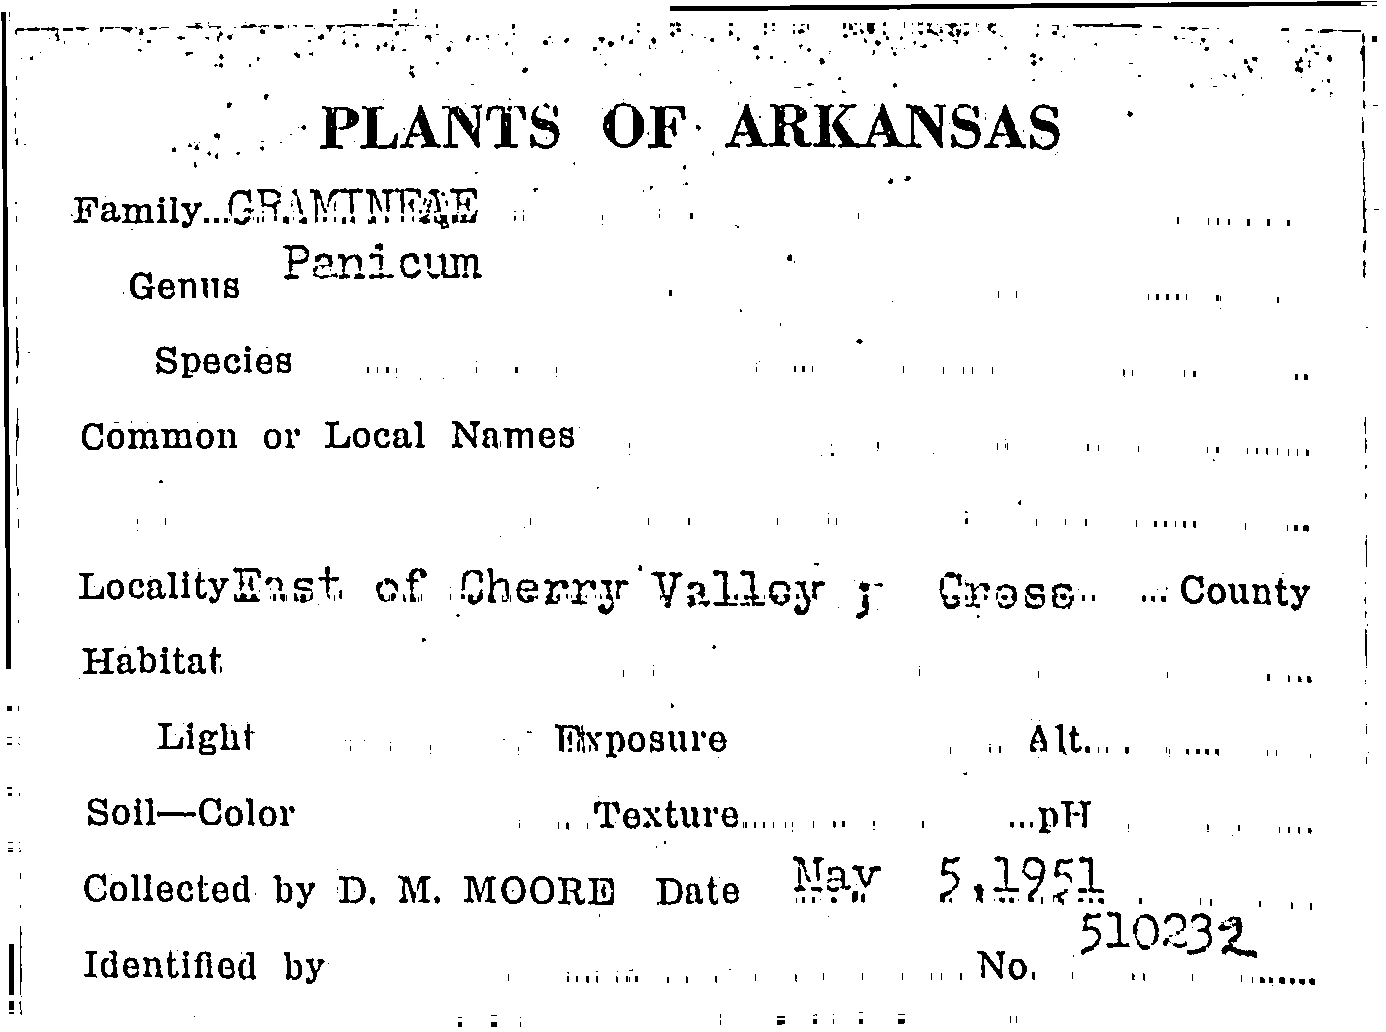

In [8]:
def remove_lines(idx):
    label = Label(IMAGES[idx])
    label.deskew()
    label.binarize()

    h_lines = label.find_horizontal_lines(line_length=100, line_gap=5)
    label.remove_horiz_lines(h_lines, line_width=6, window=20, threshold=2)

    v_lines = label.find_vertical_lines(line_length=100, line_gap=5)
    label.remove_vert_lines(v_lines, line_width=6, window=20, threshold=2)

    text = label.ocr_text()

    image = label.to_pil()
    draw = ImageDraw.Draw(image)
    print(text)
    display(image)


remove_lines(IDX)
# interact(remove_lines, idx=(0, len(IMAGES) - 1))

In [9]:
%%javascript
$('.output_label').css('font-size', '16pt')

<IPython.core.display.Javascript object>